In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

## importing the dataset

In [2]:
df=pd.read_csv(r'Downloads\adult\adult.data',header=None,names=['Age','Workclass','fnlwgt','education','edu_no','marital_stat','occupation','relationship','race','sex','capital_gain','capital_loss','hrs_per_week','country','income'])

In [3]:
df.head()

,Age,Workclass,fnlwgt,education,edu_no,marital_stat,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.duplicated().sum()

24

In [6]:
data=df.drop_duplicates()

In [7]:
data.shape

(32537, 15)

In [8]:
dt=data.copy()

In [9]:
dt.head()

,Age,Workclass,fnlwgt,education,edu_no,marital_stat,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## missing value

In [10]:
dt.isnull().sum().sum()

0

In [11]:
dt.nunique()

Age                73
Workclass           9
fnlwgt          21648
education          16
edu_no             16
marital_stat        7
occupation         15
relationship        6
race                5
sex                 2
capital_gain      119
capital_loss       92
hrs_per_week       94
country            42
income              2
dtype: int64

In [12]:
dt['income']=dt['income'].str.replace('<=50K','0')
dt['income']=dt['income'].str.replace('>50K','1')


In [13]:
dt.head()

,Age,Workclass,fnlwgt,education,edu_no,marital_stat,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [14]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Age           32537 non-null  int64 
 1   Workclass     32537 non-null  object
 2   fnlwgt        32537 non-null  int64 
 3   education     32537 non-null  object
 4   edu_no        32537 non-null  int64 
 5   marital_stat  32537 non-null  object
 6   occupation    32537 non-null  object
 7   relationship  32537 non-null  object
 8   race          32537 non-null  object
 9   sex           32537 non-null  object
 10  capital_gain  32537 non-null  int64 
 11  capital_loss  32537 non-null  int64 
 12  hrs_per_week  32537 non-null  int64 
 13  country       32537 non-null  object
 14  income        32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [15]:
dt['income']=dt['income'].astype('int')

In [16]:
dt['income'].dtypes

dtype('int32')

In [17]:
cat_df=[i for i in dt.columns if dt[i].dtypes=='O']
num_df=[i for i in dt.columns if dt[i].dtypes!='O']

In [18]:
dt[num_df]

,Age,fnlwgt,edu_no,capital_gain,capital_loss,hrs_per_week,income
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0
...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0
32557,40,154374,9,0,0,40,1
32558,58,151910,9,0,0,40,0
32559,22,201490,9,0,0,20,0


In [19]:
dt[cat_df]

,Workclass,education,marital_stat,occupation,relationship,race,sex,country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [20]:
dt.groupby('sex').count()

,Age,Workclass,fnlwgt,education,edu_no,marital_stat,occupation,relationship,race,capital_gain,capital_loss,hrs_per_week,country,income
sex,,,,,,,,,,,,,,
Female,10762,10762,10762,10762,10762,10762,10762,10762,10762,10762,10762,10762,10762,10762
Male,21775,21775,21775,21775,21775,21775,21775,21775,21775,21775,21775,21775,21775,21775


In [21]:
dt.groupby('sex').mean()

,Age,fnlwgt,edu_no,capital_gain,capital_loss,hrs_per_week,income
sex,,,,,,,
Female,36.864709,185713.506969,10.037168,568.885895,61.238803,36.415257,0.109552
Male,39.436051,191791.077199,10.103881,1330.285832,100.282342,42.429667,0.305855


## Exploring the data

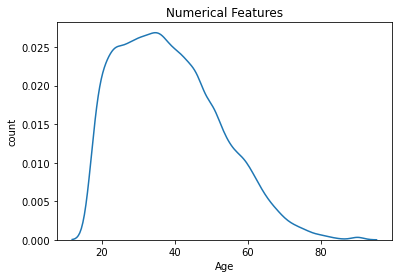

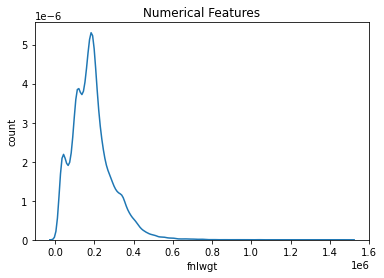

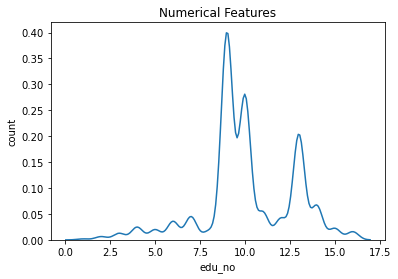

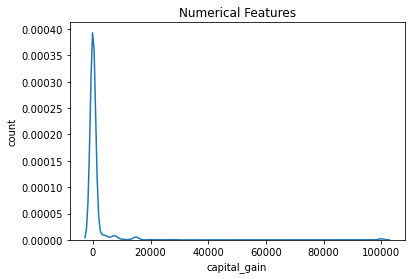

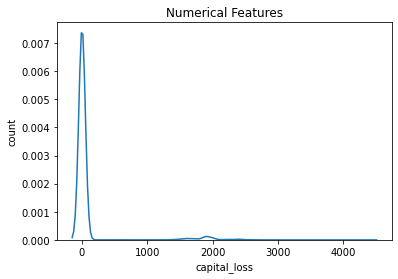

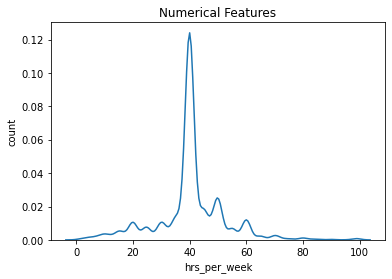

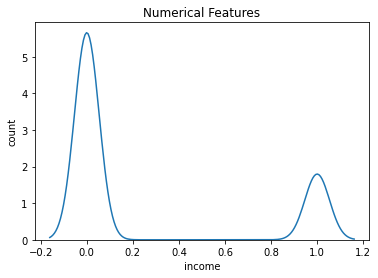

In [22]:
for fea in num_df:
    sns.kdeplot(dt[fea])
    plt.xlabel(fea)
    plt.ylabel('count')
    plt.title('Numerical Features')
    plt.show()

<AxesSubplot:xlabel='marital_stat', ylabel='count'>

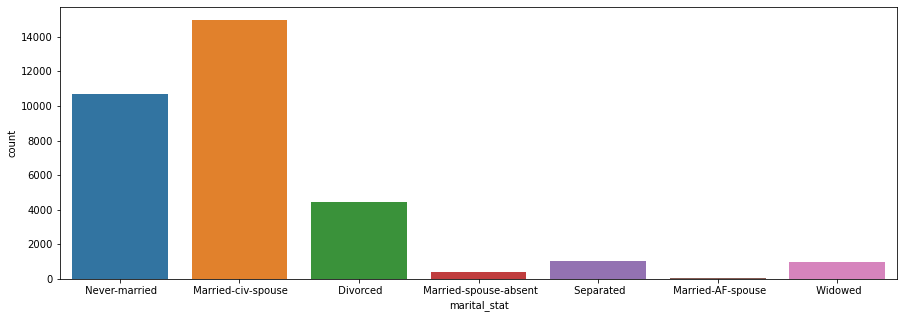

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(dt['marital_stat'])

<AxesSubplot:xlabel='Workclass', ylabel='count'>

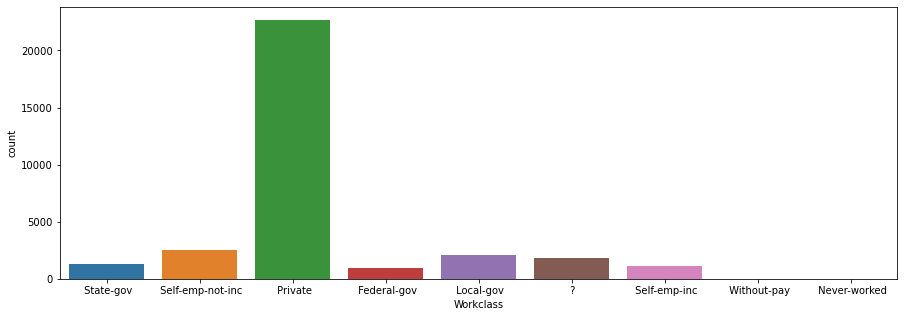

In [24]:
plt.figure(figsize=(15,5))
sns.countplot(dt['Workclass'])

<AxesSubplot:xlabel='education', ylabel='count'>

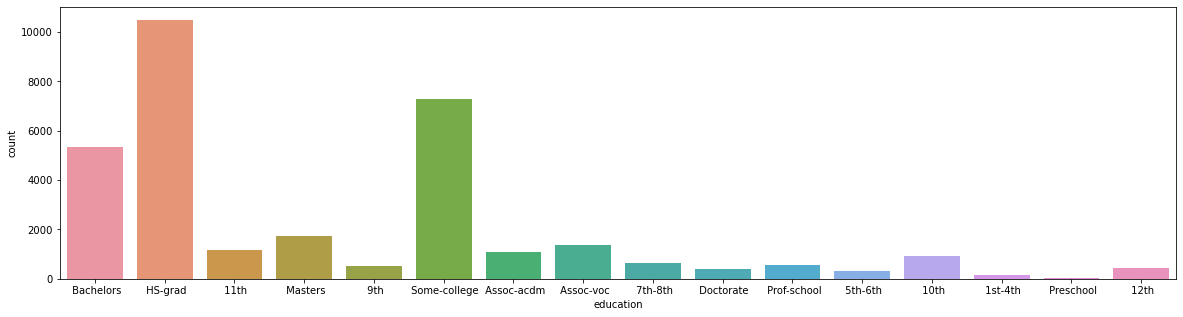

In [25]:
plt.figure(figsize=(20,5))
sns.countplot(dt['education'])

<AxesSubplot:xlabel='occupation', ylabel='count'>

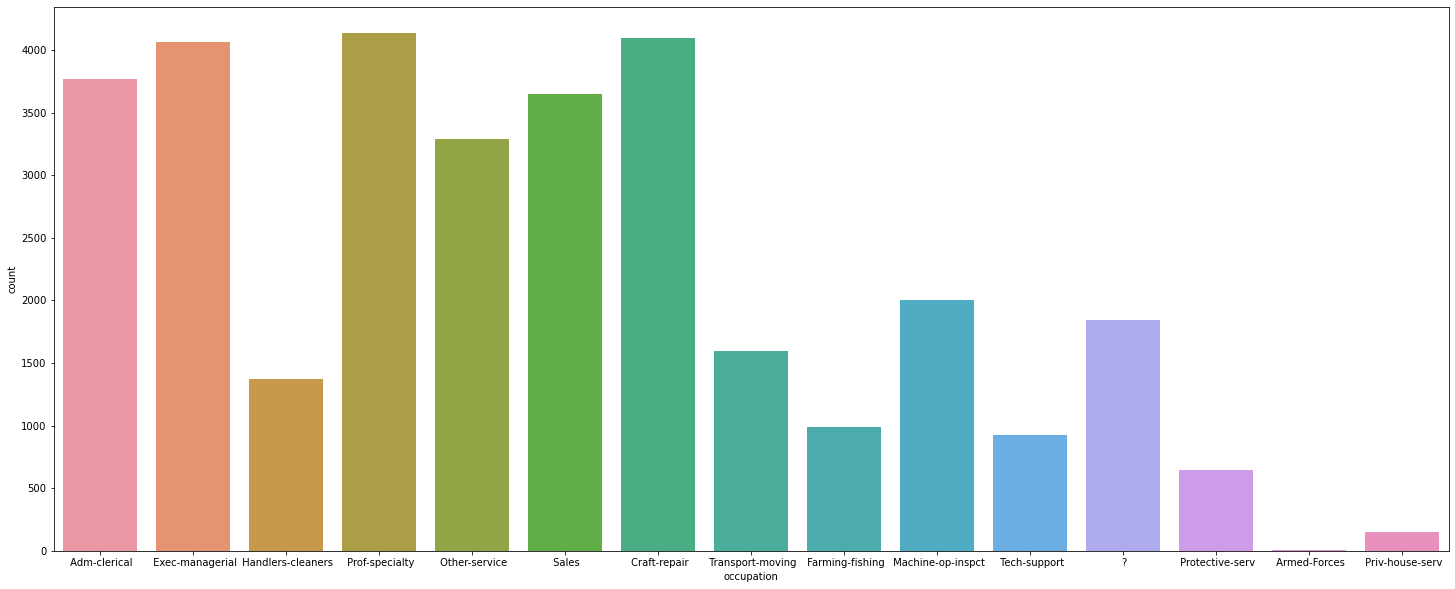

In [26]:
plt.figure(figsize=(25,10))
sns.countplot(dt['occupation'])

<AxesSubplot:xlabel='relationship', ylabel='count'>

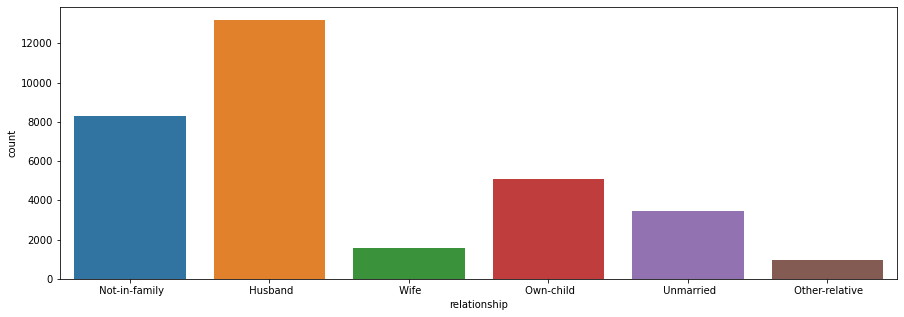

In [27]:
plt.figure(figsize=(15,5))
sns.countplot(dt['relationship'])

<AxesSubplot:xlabel='race', ylabel='count'>

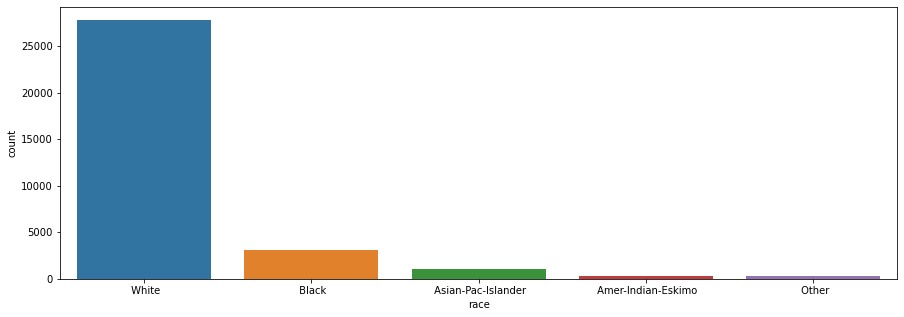

In [28]:
plt.figure(figsize=(15,5))
sns.countplot(dt['race'])

<AxesSubplot:xlabel='sex', ylabel='count'>

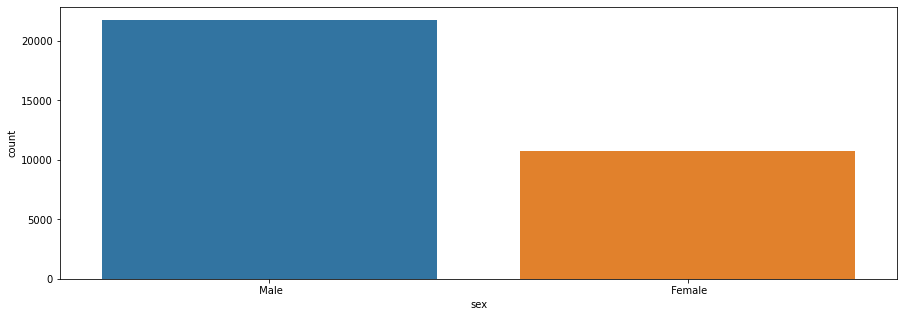

In [29]:
plt.figure(figsize=(15,5))
sns.countplot(dt['sex'])

<AxesSubplot:xlabel='income', ylabel='count'>

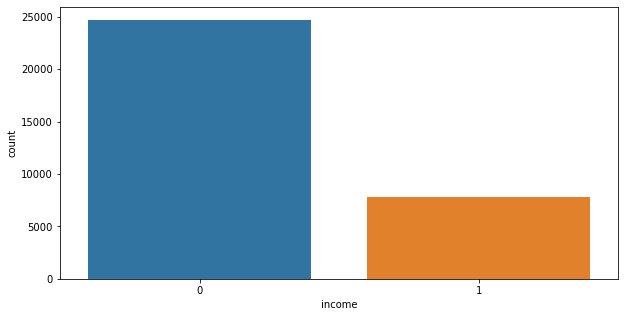

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(dt['income'])

In [31]:
dt['Workclass']=dt['Workclass'].str.replace('?','unknown')
dt['occupation']=dt['occupation'].str.replace('?','unknown')

In [32]:
dt['Workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' unknown', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [33]:
dt['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' unknown', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

## Outliers

<AxesSubplot:xlabel='Age'>

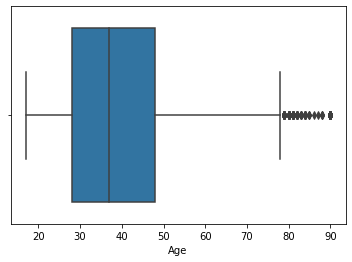

In [34]:
sns.boxplot(dt['Age'])

<AxesSubplot:xlabel='fnlwgt'>

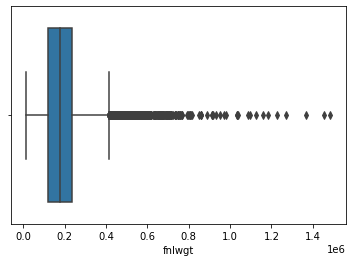

In [35]:
sns.boxplot(dt['fnlwgt'])

<AxesSubplot:xlabel='capital_gain'>

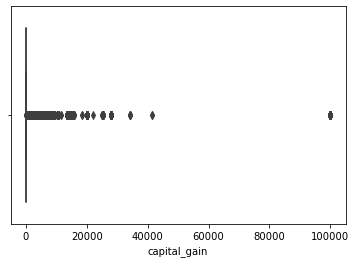

In [36]:
sns.boxplot(dt['capital_gain'])

<AxesSubplot:xlabel='capital_loss'>

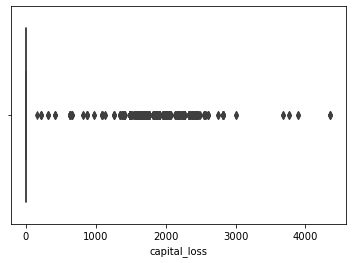

In [37]:
sns.boxplot(dt['capital_loss'])

<AxesSubplot:xlabel='Age'>

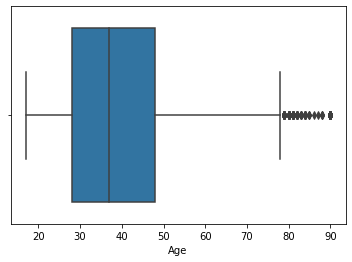

In [38]:
sns.boxplot(dt['Age'])

## Feature engineering

In [39]:
dt.head()

,Age,Workclass,fnlwgt,education,edu_no,marital_stat,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [40]:
dt.Workclass.value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 unknown              1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [41]:
dt['Workclass']=dt.Workclass.str.replace('Never-worked','Not-worked')

In [42]:
dt.education.value_counts()

 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: education, dtype: int64

In [43]:
dt['education']=dt.education.str.replace('HS-grad','high school')
dt['education']=dt.education.str.replace('Bachelors','UG')
dt['education']=dt.education.str.replace('Masters','PG')
dt['education']=dt.education.str.replace('Doctorate','Doc')
for i in ['11th','10th','7th-8th','9th','12th','5th-6th','1st-4th','Preschool','Prof-school'] :
    dt['education']=dt['education'].str.replace(i , 'School')

for i in ['Some-college','Assoc-voc','Assoc-acdm'] :
    dt['education']=dt['education'].str.replace(i , 'higher-edu')

In [44]:
dt['marital_stat'].value_counts()

 Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_stat, dtype: int64

In [45]:
for i in ['Married-civ-spouse','Married-AF-spouse']:
    dt['marital_stat']=dt['marital_stat'].str.replace(i , 'Married')
    
dt['marital_stat']=dt.marital_stat.str.replace('Never-married','Not-married')

for i in ['Divorced','Separated','Married-spouse-absent']:
    dt['marital_stat']=dt['marital_stat'].str.replace(i , 'other')

In [46]:
dt['occupation'].value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 unknown              1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: occupation, dtype: int64

In [47]:
dt['relationship'].value_counts()

 Husband           13187
 Not-in-family      8292
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [48]:
dt['country'].value_counts()

 United-States                 29153
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [49]:
dt['country']=dt.country.str.replace('?','not mentioned')

<AxesSubplot:xlabel='income', ylabel='count'>

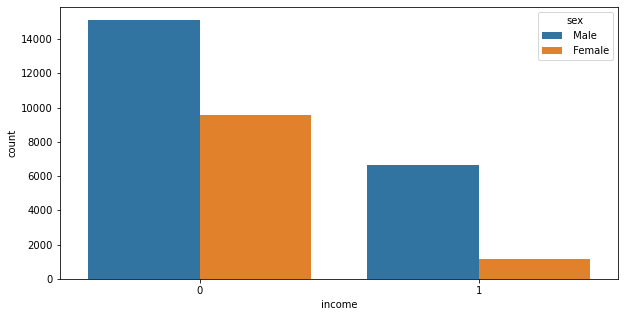

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(dt['income'],hue='sex',data=dt)

<AxesSubplot:xlabel='income', ylabel='count'>

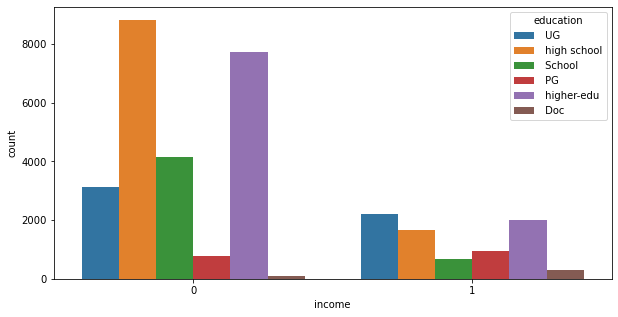

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(dt['income'],hue='education',data=dt)

<AxesSubplot:xlabel='income', ylabel='count'>

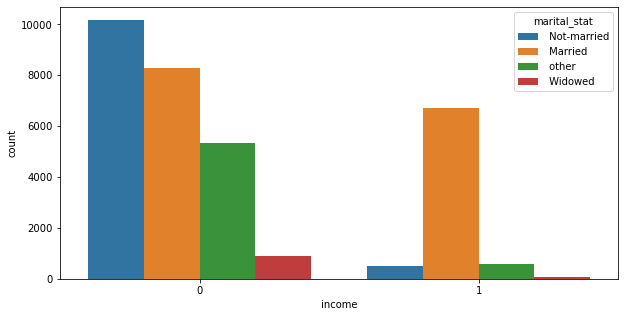

In [52]:
plt.figure(figsize=(10,5))
sns.countplot(dt['income'],hue='marital_stat',data=dt)

<AxesSubplot:xlabel='income', ylabel='count'>

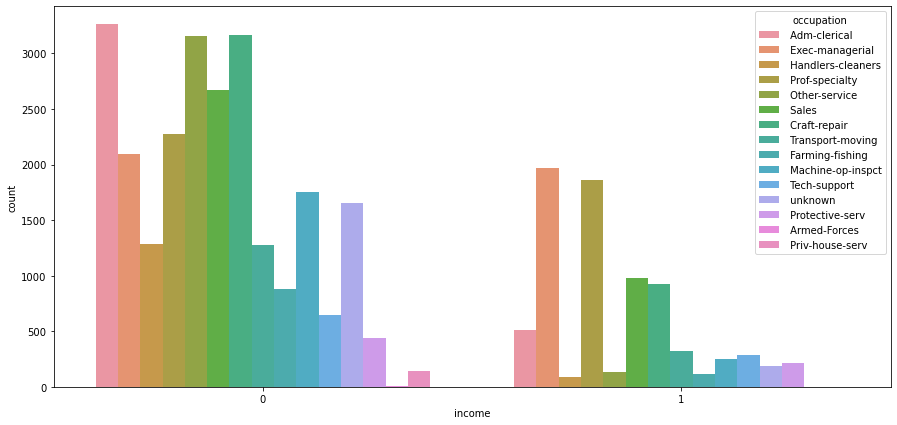

In [53]:
plt.figure(figsize=(15,7))
sns.countplot(dt['income'],hue='occupation',data=dt)

<AxesSubplot:xlabel='income', ylabel='count'>

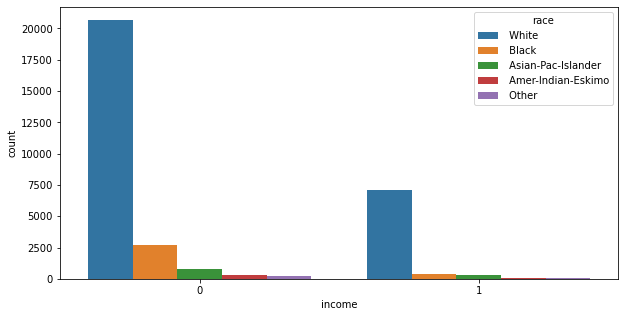

In [54]:
plt.figure(figsize=(10,5))
sns.countplot(dt['income'],hue='race',data=dt)

<AxesSubplot:xlabel='income', ylabel='count'>

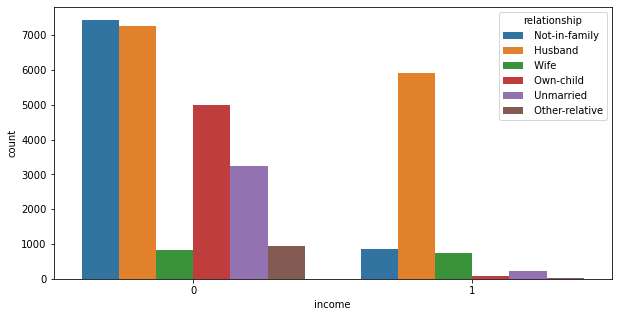

In [55]:
plt.figure(figsize=(10,5))
sns.countplot(dt['income'],hue='relationship',data=dt)

In [56]:
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32537.0,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
fnlwgt,32537.0,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
edu_no,32537.0,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
capital_gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,99999.0
capital_loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,4356.0
hrs_per_week,32537.0,40.440329,12.346889,1.0,40.0,40.0,45.0,99.0
income,32537.0,0.240926,0.427652,0.0,0.0,0.0,0.0,1.0


<AxesSubplot:>

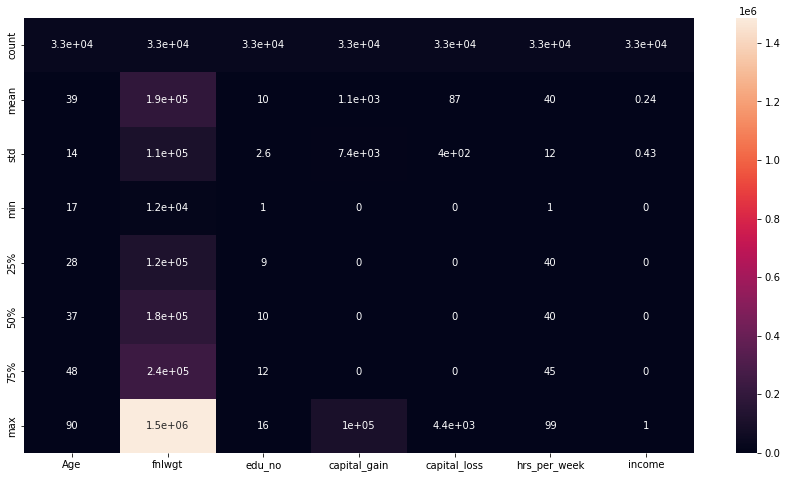

In [57]:
plt.figure(figsize=(15,8))
sns.heatmap(dt.describe(),annot=True)

In [58]:
dt.corr()

,Age,fnlwgt,edu_no,capital_gain,capital_loss,hrs_per_week,income
Age,1.000000,-0.076447,0.036224,0.077676,0.057745,0.068515,0.234037
fnlwgt,-0.076447,1.000000,-0.043388,0.000429,-0.010260,-0.018898,-0.009502
edu_no,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422,0.335272
capital_gain,0.077676,0.000429,0.122664,1.000000,-0.031639,0.078408,0.223336
capital_loss,0.057745,-0.010260,0.079892,-0.031639,1.000000,0.054229,0.150501
hrs_per_week,0.068515,-0.018898,0.148422,0.078408,0.054229,1.000000,0.229658
income,0.234037,-0.009502,0.335272,0.223336,0.150501,0.229658,1.000000


<AxesSubplot:>

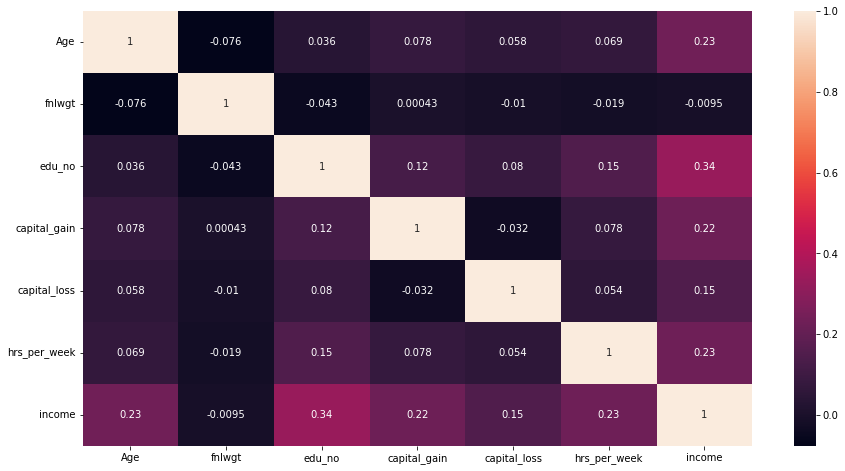

In [59]:
plt.figure(figsize=(15,8))
sns.heatmap(dt.corr(),annot=True)

In [60]:
dt.cov()

,Age,fnlwgt,edu_no,capital_gain,capital_loss,hrs_per_week,income
Age,185.994594,-1.100517e+05,1.270447,7.826382e+03,317.454068,11.536939,1.364977
fnlwgt,-110051.688494,1.114217e+10,-11777.880524,3.342341e+05,-436568.823027,-24629.699183,-428.949578
edu_no,1.270447,-1.177788e+04,6.613296,2.330502e+03,82.818379,4.712652,0.368719
capital_gain,7826.382249,3.342341e+05,2330.502298,5.458191e+07,-94224.613427,7152.207079,705.625846
capital_loss,317.454068,-4.365688e+05,82.818379,-9.422461e+04,162491.087819,269.901814,25.944414
hrs_per_week,11.536939,-2.462970e+04,4.712652,7.152207e+03,269.901814,152.445672,1.212634
income,1.364977,-4.289496e+02,0.368719,7.056258e+02,25.944414,1.212634,0.182886


<AxesSubplot:>

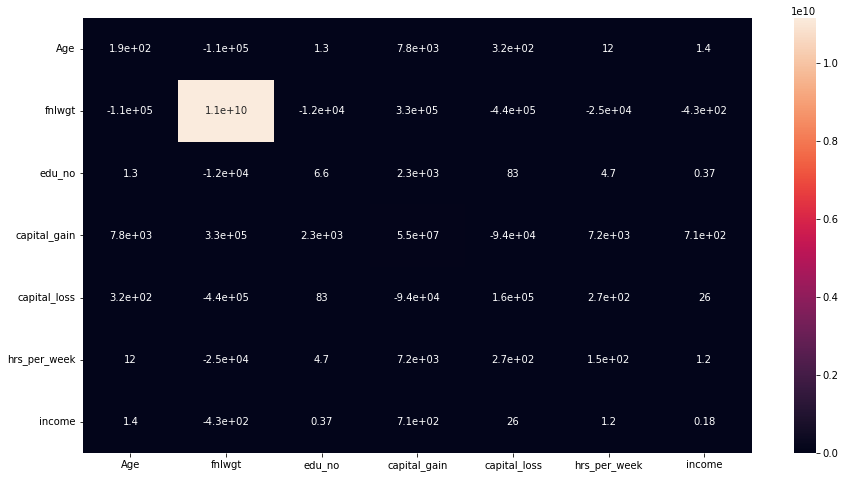

In [61]:
plt.figure(figsize=(15,8))
sns.heatmap(dt.cov(),annot=True)

In [62]:
dt.skew()

Age              0.557663
fnlwgt           1.447703
edu_no          -0.309500
capital_gain    11.949403
capital_loss     4.592702
hrs_per_week     0.228759
income           1.211687
dtype: float64

<AxesSubplot:xlabel='education', ylabel='count'>

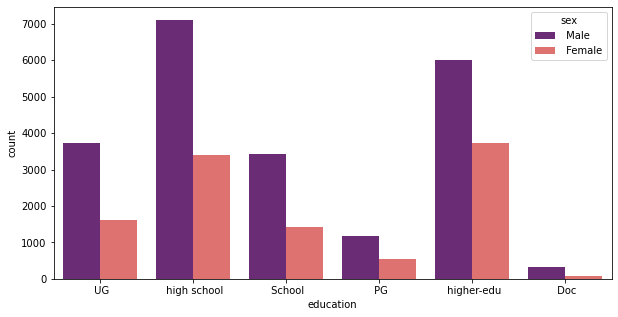

In [63]:
plt.figure(figsize=(10,5))
sns.countplot(dt['education'],hue='sex',data=dt,palette='magma')

<AxesSubplot:xlabel='education', ylabel='count'>

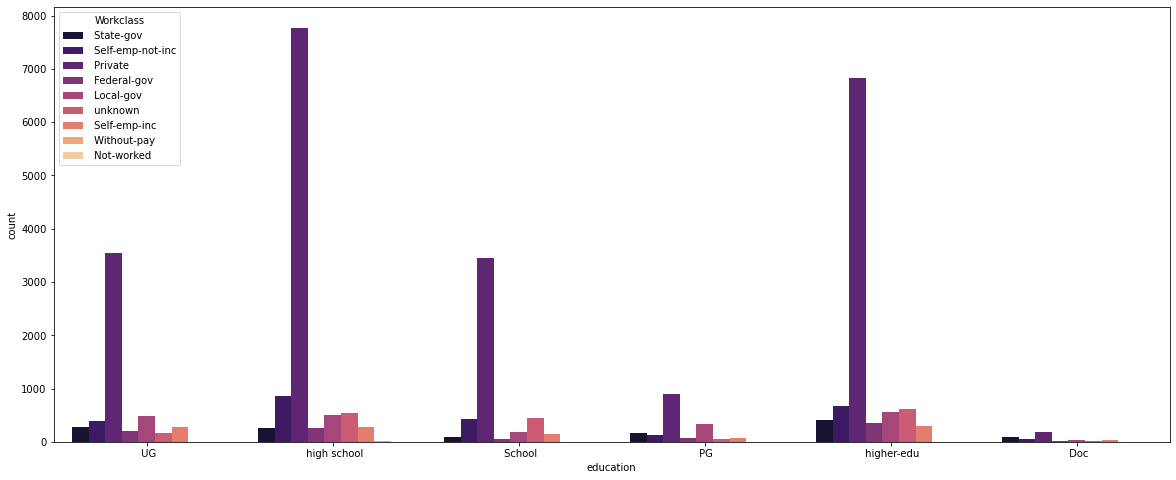

In [64]:
plt.figure(figsize=(20,8))
sns.countplot(dt['education'],hue='Workclass',data=dt,palette='magma')

<AxesSubplot:xlabel='education', ylabel='count'>

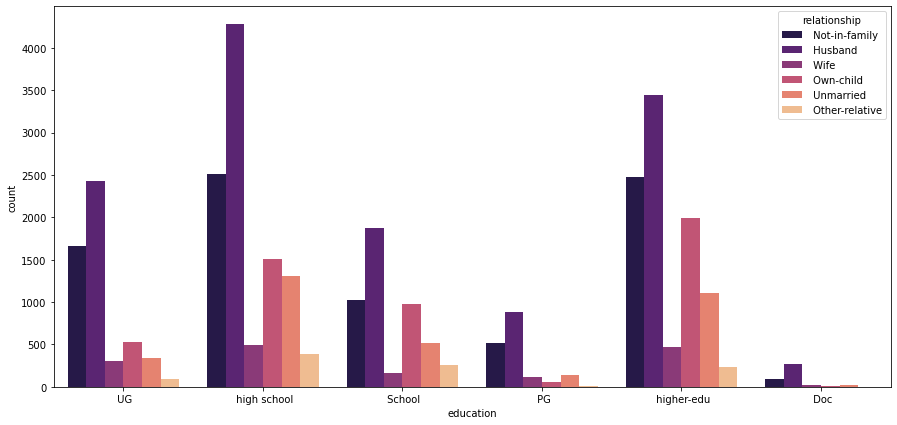

In [65]:
plt.figure(figsize=(15,7))
sns.countplot(dt['education'],hue='relationship',data=dt,palette='magma')

<AxesSubplot:xlabel='education', ylabel='count'>

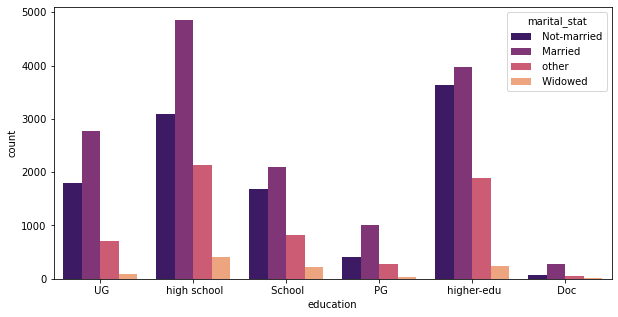

In [66]:
plt.figure(figsize=(10,5))
sns.countplot(dt['education'],hue='marital_stat',data=dt,palette='magma')

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>,
        <AxesSubplot:title={'center':'edu_no'}>],
       [<AxesSubplot:title={'center':'capital_gain'}>,
        <AxesSubplot:title={'center':'capital_loss'}>,
        <AxesSubplot:title={'center':'hrs_per_week'}>],
       [<AxesSubplot:title={'center':'income'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

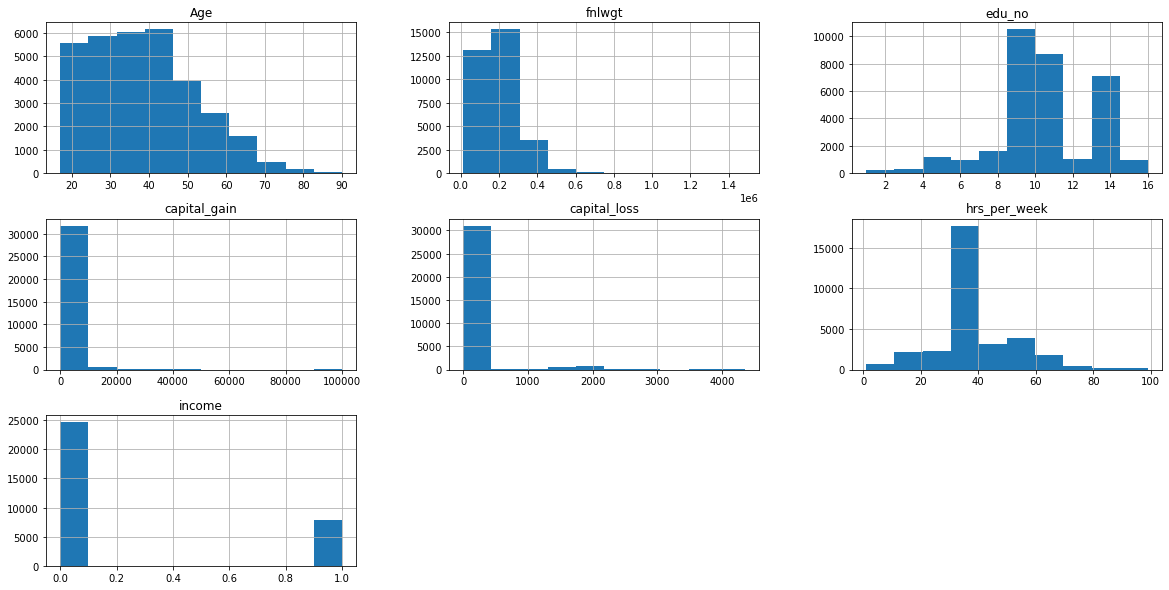

In [67]:
dt.hist(figsize=(20,10))

## model building

In [68]:
x=dt.drop(['income'],axis=1)
y=dt['income']

In [69]:
x.head()

,Age,Workclass,fnlwgt,education,edu_no,marital_stat,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,country
0,39,State-gov,77516,UG,13,Not-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,UG,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,high school,9,other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,UG,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [70]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int32

## Feature scaling

In [71]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [72]:
scaler=StandardScaler()

In [73]:
dff=dt.copy()

In [74]:
dff=dff.apply(LabelEncoder().fit_transform)
dff.head()

,Age,Workclass,fnlwgt,education,edu_no,marital_stat,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,country,income
0,22,6,2671,3,12,1,0,1,4,1,25,0,39,38,0
1,33,5,2926,3,12,0,3,0,4,1,0,0,12,38,0
2,21,3,14086,4,8,3,5,1,4,1,0,0,39,38,0
3,36,3,15336,2,6,0,5,0,2,1,0,0,39,38,0
4,11,3,19355,3,12,0,9,5,2,0,0,0,39,4,0


In [75]:
x1=dff.drop(['income'],axis=1)

In [76]:
std=scaler.fit(x1)

In [77]:
x=std.transform(x1)

In [78]:
x

array([[ 0.03049538,  1.65772373, -1.29412879, ..., -0.20425514,
        -0.03135653,  0.25114627],
       [ 0.8373638 ,  1.02582799, -1.25197053, ..., -0.20425514,
        -2.25483537,  0.25114627],
       [-0.0428563 , -0.23796351,  0.59307296, ..., -0.20425514,
        -0.03135653,  0.25114627],
       ...,
       [ 1.4241772 , -0.23796351, -0.43244718, ..., -0.20425514,
        -0.03135653,  0.25114627],
       [-1.21648309, -0.23796351,  0.39385455, ..., -0.20425514,
        -1.67837789,  0.25114627],
       [ 0.98406715,  0.39393224,  1.21122866, ..., -0.20425514,
        -0.03135653,  0.25114627]])

In [79]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32537, dtype: int32

## splitting the dataset into train and test

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25 ,random_state=42)

## Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
Log=LogisticRegression()

In [89]:
Log.fit(X_train , y_train)

LogisticRegression()

In [90]:
Log.predict_proba(X_train)

array([[0.67924283, 0.32075717],
       [0.72505988, 0.27494012],
       [0.98415581, 0.01584419],
       ...,
       [0.99235869, 0.00764131],
       [0.631054  , 0.368946  ],
       [0.93874919, 0.06125081]])

## ROC-AUC score 

In [91]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## roc-auc score for y train

In [93]:
y_train_pred=Log.predict_proba(X_train)
roc_auc_score(y_train,y_train_pred[:,1])

0.8806434691793046

## roc-auc score for y test

In [97]:
y_test_pred=Log.predict_proba(X_test)
roc_auc_score(y_test,y_test_pred[:,1])

0.881991102188759

## pickling the dataset

In [98]:
import pickle

In [99]:
with open('uci_income_data.pkl','wb') as f:
    pickle.dump(Log,f)

In [100]:
y_pred=Log.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [101]:
accuracy_score(y_test,y_pred)

0.8372464658881377

## SVC kernel

In [104]:
from sklearn.svm import SVC
classifier = SVC(kernel="rbf")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.8505224339274738